## Setup

In [1]:
from gensim.models import KeyedVectors
import numpy as np

In [2]:
model_w2v = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [105]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

## Demonstrating similarity

In [7]:
model_w2v.most_similar('professor')


/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('associate_professor', 0.8847021460533142),
 ('professor_emeritus', 0.8773139119148254),
 ('assistant_professor', 0.8518873453140259),
 ('emeritus_professor', 0.817015528678894),
 ('lecturer', 0.801132321357727),
 ('Professor', 0.7567095756530762),
 ('economics_professor', 0.7433779835700989),
 ('adjunct_professor', 0.7406430244445801),
 ('Associate_Professor', 0.7392270565032959),
 ('psychology_professor', 0.7311919927597046)]

## Vector Algebra Demonstration:  King - man + woman = Queen

In [10]:
model_w2v.most_similar(positive=['king', 'woman'], negative=['man'], topn=15)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087165832519531),
 ('throne', 0.5005807876586914),
 ('royal', 0.4938204884529114),
 ('Princess_Sikhanyiso', 0.4936617612838745),
 ('ruler', 0.4909275770187378)]

## Potential issues for downstream use

In [106]:
model_w2v.most_similar(positive=['doctor', 'woman'], negative=['man'], topn=5)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('gynecologist', 0.7093892097473145),
 ('nurse', 0.647728681564331),
 ('doctors', 0.6471461057662964),
 ('physician', 0.64389967918396),
 ('pediatrician', 0.6249487996101379)]

In [107]:
model_w2v.most_similar(positive=['computer_programmer', 'woman'], negative=['man'], topn=5)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('homemaker', 0.5627118945121765),
 ('housewife', 0.5105047225952148),
 ('graphic_designer', 0.505180299282074),
 ('schoolteacher', 0.49794942140579224),
 ('businesswoman', 0.49348920583724976)]

## If you work with vectors directly you may miss this

In [11]:
word1 = 'man'
word2 = 'woman'
# word3 = '?'
word4 = 'computer_programmer'

vector1 = model_w2v[word1]
vector2 = model_w2v[word2]
#vector3 = model_w2v[word3]
vector4 = model_w2v[word4]

output = vector4 - vector1 + vector2

model_w2v.similar_by_vector(output, topn=10, restrict_vocab=None)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('computer_programmer', 0.9105811715126038),
 ('homemaker', 0.5771316289901733),
 ('schoolteacher', 0.5500192046165466),
 ('graphic_designer', 0.5464699268341064),
 ('mechanical_engineer', 0.539836585521698),
 ('electrical_engineer', 0.533705472946167),
 ('housewife', 0.5274524688720703),
 ('programmer', 0.5096209049224854),
 ('businesswoman', 0.5029540657997131),
 ('keypunch_operator', 0.4974639415740967)]

### From the examples above - you can infer that applications that work directly with vectors will on superficial examination, give the "correct" result, but the problem is waiting to bite you.

## Can we partition Gendered subspace in Word2Vec

In [4]:
pairs = [('hers', 'his'),
         ('gal', 'guy'),
         ('her', 'him'),
         ('Queen', 'King'),
         ('Mary', 'John'),
         ('feminist', 'sexist'),
         ('feminized', 'masculinized'),
         ('dude', 'chick'),
         ('she', 'he'),
         ('motherly','fatherly'),
         ('feminised', 'masculinised'),
         ('herself', 'himself'),
         ('vagina', 'penis'),
         ('priest','nun'),
         ('mommy','daddy'),
         ('sister','brother'),
         ('grandmother','grandfather'),
         ('mom','dad'),
         ('feminine','masculine'),
         ('aunt', 'uncle'),
         ('woman', 'man'),      
         ('grandma','grandpa'),
         ('mother', 'father'),   
         ('actress','actor'),      
         ('wife','husband'),
         ('female', 'male'),
         ('daughter', 'son'),
         ('girlfriend','boyfriend'),
         ('girl', 'boy'),
        ('plumber','hairdresser'),
        ('carpenter', 'seamstress'),
        ('doctor','nurse')]

### Why no mummies? Words can mean different things in different locations...

In [125]:
model_w2v.most_similar(positive=['mummy'], topn=15)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mummies', 0.690479576587677),
 ('Sherit', 0.6301602721214294),
 ('Pa_Ib', 0.6211981177330017),
 ('Egyptian_mummy', 0.6202528476715088),
 ('Hatshepsut_Hawass_told', 0.6132522821426392),
 ('mummified', 0.6061875820159912),
 ('Nesperennub', 0.5982159376144409),
 ('queen_Nefertiti', 0.592476487159729),
 ('Tutankhamen', 0.5834780931472778),
 ('Iret_net_Hor_irw', 0.5805263519287109),
 ('tomb', 0.562680184841156),
 ('viewing_Tut_tomb', 0.5619694590568542),
 ('Irethorrou', 0.5618146657943726),
 ('pharaoh_Tutankhamen', 0.5613417625427246),
 ('linen_wrappings', 0.5611655116081238)]

## PCA on the first 20 word pairs.

In [65]:
num_pairs=20

32
[0.21463335 0.10816296 0.09112418 0.07922068 0.06110564]


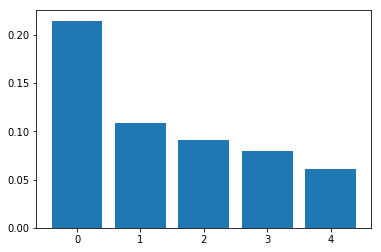

In [66]:

from sklearn.preprocessing import StandardScaler

model_w2v.init_sims()

print(len(pairs))
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
difference_matrix_male = np.array([model_w2v.word_vec(a[0], use_norm=False) - model_w2v.word_vec(a[1], use_norm=False) for a in pairs[:num_pairs]])
#difference_matrix_male = StandardScaler().fit_transform(difference_matrix_male)

from sklearn.decomposition import PCA
pca_male = PCA(n_components=5)
pca_male.fit_transform(difference_matrix_male)
print(pca_male.explained_variance_ratio_)

index = np.arange(len(pca_male.explained_variance_ratio_))
plt.bar(index, pca_male.explained_variance_ratio_)
plt.show()

## Select the Eigenvector that explains most of the varience in the direction of the "masculine"

In [68]:
gender_male = pca_male.components_[0]
model_w2v.similar_by_vector(gender_male, topn=5, restrict_vocab=None)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[("he'sa", 0.33175212144851685),
 ('himself', 0.32509180903434753),
 ('Angelo_Mosca', 0.3226165771484375),
 ('Braylon_Edwards_Kellen_Winslow', 0.32104557752609253),
 ('Eddie_Taubensee', 0.3171394169330597)]

## Repeat - Select the Eigenvector that explains most of the varience in the direction of the "feminine"

In [69]:
from sklearn.preprocessing import StandardScaler
difference_matrix_female = np.array([model_w2v.word_vec(a[1], use_norm=False) - model_w2v.word_vec(a[0], use_norm=False) for a in pairs[:num_pairs]])
from sklearn.decomposition import PCA
pca_female = PCA(n_components=5)
pca_female.fit_transform(difference_matrix_female)
gender_female = pca_female.components_[0]
model_w2v.similar_by_vector(gender_female, topn=5, restrict_vocab=None)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('her', 0.41374996304512024),
 ('she', 0.407878577709198),
 ('Berry_Lea_Michele', 0.39791521430015564),
 ('daughter_Satyana', 0.3962993025779724),
 ('heroine', 0.3940812945365906)]

## Tests - have we got roughly the right vector representation.

In [70]:
word = 'computer_programmer'
term = model_w2v[word]
model_w2v.most_similar(positive=[gender_female, term], negative=[gender_male], topn=5)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('computer_programmer', 0.8775547742843628),
 ('homemaker', 0.575336217880249),
 ('housewife', 0.5356433391571045),
 ('graphic_designer', 0.5262938141822815),
 ('schoolteacher', 0.524954617023468)]

In [95]:
word = 'job'
term = model_w2v[word]
model_w2v.most_similar(positive=[gender_female, term], negative=[gender_male], topn=5)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('job', 0.7601036429405212),
 ('jobs', 0.5286347270011902),
 ('waitressing', 0.49453747272491455),
 ('secretarial', 0.4450209438800812),
 ('maternity_leave', 0.43278470635414124)]

## Here is one we prepared earlier - ConceptNet Numberbatch

In [100]:
model = KeyedVectors.load_word2vec_format('numberbatch-en-17.06.txt', binary=False)

In [104]:
model.most_similar(positive=['computer_programmer', 'woman'], negative=['man'], topn=10)

/Users/mfallu/Documents/projects/envs/prodigy/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('software_engineer', 0.8788665533065796),
 ('programmer', 0.8787931203842163),
 ('systems_analyst', 0.7885132431983948),
 ('nonprogrammer', 0.7824258804321289),
 ('analyst_programmer', 0.7734425067901611),
 ('noncoder', 0.7632148265838623),
 ('system_administrator', 0.7326393127441406),
 ('computer_expert', 0.7211934328079224),
 ('nuclear_engineer', 0.7165764570236206),
 ('programmers', 0.7067961692810059)]